In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV,cross_val_score
import sklearn.ensemble

In [3]:
train_x = pd.read_csv('data/data-science-london-scikit-learn/train.csv',header=None)
train_y = pd.read_csv('data/data-science-london-scikit-learn/trainLabels.csv',header=None)
test_x = pd.read_csv('data/data-science-london-scikit-learn/test.csv',header=None)

In [4]:
conca = pd.concat([train_x,train_y],axis=1)
corr = conca.corr()
cor = corr[0]

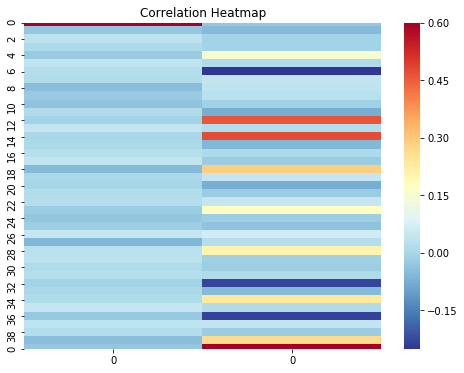

In [6]:
plt.figure(figsize = (8, 6))
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(cor, cmap = plt.cm.RdYlBu_r, vmin = -0.25, vmax = 0.6)  #annot選擇是否每格顯示數字
plt.title('Correlation Heatmap'); 

In [13]:
conca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
0     1000 non-null float64
1     1000 non-null float64
2     1000 non-null float64
3     1000 non-null float64
4     1000 non-null float64
5     1000 non-null float64
6     1000 non-null float64
7     1000 non-null float64
8     1000 non-null float64
9     1000 non-null float64
10    1000 non-null float64
11    1000 non-null float64
12    1000 non-null float64
13    1000 non-null float64
14    1000 non-null float64
15    1000 non-null float64
16    1000 non-null float64
17    1000 non-null float64
18    1000 non-null float64
19    1000 non-null float64
20    1000 non-null float64
21    1000 non-null float64
22    1000 non-null float64
23    1000 non-null float64
24    1000 non-null float64
25    1000 non-null float64
26    1000 non-null float64
27    1000 non-null float64
28    1000 non-null float64
29    1000 non-null float64
30    1000 non-null float64
31    1000 non-null float6

In [7]:
conca.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,0
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451,0.51000
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439,0.50015
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086,0.00000
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041,0.00000
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944,1.00000
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193,1.00000
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984,1.00000


In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

std = StandardScaler()
X_std = std.fit_transform(train_x)
mms = MinMaxScaler()
X_mms = mms.fit_transform(train_x)
norm = Normalizer()
X_norm = norm.fit_transform(train_x)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X_std, train_y, test_size=0.3,random_state=4)

In [44]:
#來試試看個模型的成效

stand = {"train_x":train_x,"X_std":X_std,"X_mms":X_mms,"X_norm":X_norm}

for i,x in stand.items():
    x_train, x_test, y_train, y_test = train_test_split(x, train_y, test_size=0.3,random_state=123)
    
    print('----------------',i,'------------------')

    # NAIBE BAYES
    from sklearn.naive_bayes import GaussianNB

    model = GaussianNB()
    model.fit(x_train,y_train.values.ravel())
    predicted= model.predict(x_test)
    print('Naive Bayes',accuracy_score(y_test, predicted))

    #KNN
    from sklearn.neighbors import KNeighborsClassifier

    knn_model = KNeighborsClassifier()
    knn_model.fit(x_train,y_train.values.ravel())
    predicted= knn_model.predict(x_test)
    print('KNN',accuracy_score(y_test, predicted))

    #RANDOM FOREST
    from sklearn.ensemble import RandomForestClassifier

    rfc_model = RandomForestClassifier(n_estimators = 100,random_state = 99)
    rfc_model.fit(x_train,y_train.values.ravel())
    predicted = rfc_model.predict(x_test)
    print('Random Forest',accuracy_score(y_test,predicted))

    #LOGISTIC REGRESSION
    from sklearn.linear_model import LogisticRegression

    lr_model = LogisticRegression(solver = 'saga')
    lr_model.fit(x_train,y_train.values.ravel())
    lr_predicted = lr_model.predict(x_test)
    print('Logistic Regression',accuracy_score(y_test, lr_predicted))

    #SVM
    from sklearn.svm import SVC

    svc_model = SVC(gamma = 'auto')
    svc_model.fit(x_train,y_train.values.ravel())
    svc_predicted = svc_model.predict(x_test)
    print('SVM',accuracy_score(y_test, svc_predicted))

    #DECISON TREE
    from sklearn.tree import DecisionTreeClassifier

    dtree_model = DecisionTreeClassifier()
    dtree_model.fit(x_train,y_train.values.ravel())
    dtree_predicted = dtree_model.predict(x_test)
    print('Decision Tree',accuracy_score(y_test, dtree_predicted))

    #GradientBOOST

    from sklearn.ensemble import GradientBoostingClassifier
    # 建立模型
    clf = GradientBoostingClassifier()
    # 訓練模型
    clf.fit(x_train, y_train.values.ravel())
    # 預測測試集
    y_pred = clf.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("GradientBoosting", acc)


    #ADABOOST

    from sklearn.ensemble import GradientBoostingClassifier
    # 建立模型
    clf = GradientBoostingClassifier(loss='exponential')
    # 訓練模型
    clf.fit(x_train, y_train.values.ravel())
    # 預測測試集
    y_pred = clf.predict(x_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    print("ADABOOST", acc)

---------------- train_x ------------------
Naive Bayes 0.8233333333333334
KNN 0.89
Random Forest 0.8533333333333334
Logistic Regression 0.84
SVM 0.9166666666666666
Decision Tree 0.7433333333333333
GradientBoosting 0.87
ADABOOST 0.8633333333333333
---------------- X_std ------------------
Naive Bayes 0.8233333333333334
KNN 0.8366666666666667
Random Forest 0.8533333333333334
Logistic Regression 0.84
SVM 0.8866666666666667
Decision Tree 0.75
GradientBoosting 0.87
ADABOOST 0.8633333333333333
---------------- X_mms ------------------
Naive Bayes 0.8233333333333334
KNN 0.84
Random Forest 0.8533333333333334
Logistic Regression 0.8333333333333334
SVM 0.8266666666666667
Decision Tree 0.75


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GradientBoosting 0.87
ADABOOST 0.8633333333333333
---------------- X_norm ------------------
Naive Bayes 0.8033333333333333
KNN 0.9033333333333333
Random Forest 0.86
Logistic Regression 0.8466666666666667
SVM 0.8233333333333334
Decision Tree 0.7866666666666666
GradientBoosting 0.87
ADABOOST 0.8666666666666667


In [45]:
#用cross_val


for i,x in stand.items():
    
    print('----------------',i,'------------------')

    # NAIBE BAYES
    from sklearn.naive_bayes import GaussianNB
    
    model = GaussianNB()
    print('Naive Bayes',cross_val_score(model,x,train_y.values.ravel(), cv=10).mean())

    #KNN
    from sklearn.neighbors import KNeighborsClassifier

    knn_model = KNeighborsClassifier()
    print('KNN',cross_val_score(knn_model,x,train_y.values.ravel(), cv=10).mean())

    #RANDOM FOREST
    from sklearn.ensemble import RandomForestClassifier

    rfc_model = RandomForestClassifier(n_estimators = 100,random_state = 99)
    print('Random Forest',cross_val_score(rfc_model,x,train_y.values.ravel(), cv=10).mean())

    #LOGISTIC REGRESSION
    from sklearn.linear_model import LogisticRegression

    lr_model = LogisticRegression(solver = 'saga')
    print('Logistic Regression',cross_val_score(lr_model,x,train_y.values.ravel(), cv=10).mean())

    #SVM
    from sklearn.svm import SVC

    svc_model = SVC(gamma = 'auto')
    print('SVM',cross_val_score(svc_model,x,train_y.values.ravel(), cv=10).mean())

    #DECISON TREE
    from sklearn.tree import DecisionTreeClassifier

    dtree_model = DecisionTreeClassifier()
    print('Decision Tree',cross_val_score(dtree_model,x,train_y.values.ravel(), cv=10).mean())

    #GradientBOOST

    from sklearn.ensemble import GradientBoostingClassifier
    # 建立模型
    clf = GradientBoostingClassifier()
    print("GradientBoosting", cross_val_score(clf,x,train_y.values.ravel(), cv=10).mean())


    #ADABOOST

    from sklearn.ensemble import GradientBoostingClassifier
    # 建立模型
    clf = GradientBoostingClassifier(loss='exponential')
    print("ADABOOST", cross_val_score(clf,x,train_y.values.ravel(), cv=10).mean())

---------------- train_x ------------------
Naive Bayes 0.8160000000000001
KNN 0.906
Random Forest 0.8690000000000001
Logistic Regression 0.8210000000000001
SVM 0.915
Decision Tree 0.775
GradientBoosting 0.883
ADABOOST 0.8700000000000001
---------------- X_std ------------------
Naive Bayes 0.8160000000000001
KNN 0.8149999999999998
Random Forest 0.8690000000000001
Logistic Regression 0.8219999999999998
SVM 0.8720000000000001
Decision Tree 0.776
GradientBoosting 0.8800000000000001
ADABOOST 0.8700000000000001
---------------- X_mms ------------------
Naive Bayes 0.8160000000000001
KNN 0.8230000000000001
Random Forest 0.8690000000000001


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

Logistic Regression 0.8210000000000001
SVM 0.818
Decision Tree 0.781
GradientBoosting 0.881
ADABOOST 0.8700000000000001
---------------- X_norm ------------------
Naive Bayes 0.808
KNN 0.9019999999999999
Random Forest 0.8699999999999999
Logistic Regression 0.8220000000000001
SVM 0.808
Decision Tree 0.796
GradientBoosting 0.874
ADABOOST 0.8789999999999999


In [52]:
#最佳化參數   使用未標準化 train_x 原始的

#Random Forest Classifier
rfc = RandomForestClassifier(random_state=99)

#USING GRID SEARCH
n_estimators = [10, 50, 100, 200,400]
max_depth = [3, 10, 20, 40]
param_grid = dict(n_estimators=n_estimators,max_depth=max_depth)

grid_search_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 10,scoring='accuracy',n_jobs=-1).fit(train_x, train_y.values.ravel())
rfc_best = grid_search_rfc.best_estimator_
print('Random Forest Best Score',grid_search_rfc.best_score_)
print('Random Forest Best Parmas',grid_search_rfc.best_params_)
print('Random Forest Accuracy',cross_val_score(rfc_best,train_x, train_y.values.ravel(), cv=10).mean())

#KNN 
knn = KNeighborsClassifier()

#USING GRID SEARCH
n_neighbors=[3,5,6,7,8,9,10]
param_grid = dict(n_neighbors=n_neighbors)

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy').fit(train_x,train_y.values.ravel())
knn_best = grid_search_knn.best_estimator_
print('KNN Best Score', grid_search_knn.best_score_)
print('KNN Best Params',grid_search_knn.best_params_)
print('KNN Accuracy',cross_val_score(knn_best,train_x, train_y.values.ravel(), cv=10).mean())

#SVM
svc = SVC()

#USING GRID SEARCH
parameters = [{'kernel':['linear'],'C':[1,10,100]},
              {'kernel':['rbf'],'C':[1,10,100],'gamma':[0.05,0.0001,0.01,0.001]}]
grid_search_svm = GridSearchCV(estimator=svc, param_grid=parameters, cv = 10, n_jobs=-1,scoring='accuracy').fit(train_x, train_y.values.ravel())
svm_best = grid_search_svm.best_estimator_
print('SVM Best Score',grid_search_svm.best_score_)
print('SVM Best Params',grid_search_svm.best_params_)
print('SVM Accuracy',cross_val_score(svm_best,train_x, train_y.values.ravel(), cv=10).mean())

Random Forest Best Score 0.874
Random Forest Best Parmas {'max_depth': 20, 'n_estimators': 200}
Random Forest Accuracy 0.874
KNN Best Score 0.911
KNN Best Params {'n_neighbors': 3}
KNN Accuracy 0.9109999999999999
SVM Best Score 0.918
SVM Best Params {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Accuracy 0.9180000000000001


In [53]:
#GradientBoost

# 建立模型
clf = GradientBoostingClassifier()

n_estimators = [50, 100, 200, 300, 400]
max_depth = [1, 2, 3, 4, 5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)

grid_search_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy').fit(train_x, train_y.values.ravel())
clf_best = grid_search_clf.best_estimator_
print('SVM Best Score',grid_search_clf.best_score_)
print('SVM Best Params',grid_search_clf.best_params_)
print('SVM Accuracy',cross_val_score(clf_best,train_x, train_y.values.ravel(), cv=10).mean())

SVM Best Score 0.894
SVM Best Params {'max_depth': 5, 'n_estimators': 300}
SVM Accuracy 0.891


In [63]:
#最後選擇SVM

##### knn svm gb #####
knn_best_pred = pd.DataFrame(knn_best.predict(test_x))
svm_best_pred = pd.DataFrame(svm_best.predict(test_x))
clf_best_pred = pd.DataFrame(clf_best.predict(test_x))

#index從1開始
knn_best_pred.index += 1
svm_best_pred.index += 1
clf_best_pred.index += 1

knn_best_pred.columns = ['Solution']
svm_best_pred.columns = ['Solution']
clf_best_pred.columns = ['Solution']

knn_best_pred['Id'] = np.arange(1,knn_best_pred.shape[0]+1)
knn_best_pred = knn_best_pred[['Id', 'Solution']]
svm_best_pred['Id'] = np.arange(1,svm_best_pred.shape[0]+1)
svm_best_pred = svm_best_pred[['Id', 'Solution']]
clf_best_pred['Id'] = np.arange(1,clf_best_pred.shape[0]+1)
clf_best_pred = clf_best_pred[['Id', 'Solution']]



knn_best_pred.to_csv('knn_best_pred.csv', index=False)
svm_best_pred.to_csv('svm_best.csv', index=False)
clf_best_pred.to_csv('clf_best.csv', index=False)